In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline

In [2]:
df = pd.read_csv("Ecommerce_Consumer_Behavior_Analysis_Data.csv")
df.head()

,Customer_ID,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Location,Purchase_Category,Purchase_Amount,...,Customer_Satisfaction,Engagement_with_Ads,Device_Used_for_Shopping,Payment_Method,Time_of_Purchase,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision
0,37-611-6911,22,Female,Middle,Married,Bachelor's,Middle,Évry,Gardening & Outdoors,$333.80,...,7,NaN,Tablet,Credit Card,3/1/2024,True,False,Need-based,No Preference,2
1,29-392-9296,49,Male,High,Married,High School,High,Huocheng,Food & Beverages,$222.22,...,5,High,Tablet,PayPal,4/16/2024,True,False,Wants-based,Standard,6
2,84-649-5117,24,Female,Middle,Single,Master's,High,Huzhen,Office Supplies,$426.22,...,7,Low,Smartphone,Debit Card,3/15/2024,True,True,Impulsive,No Preference,3
3,48-980-6078,29,Female,Middle,Single,Master's,Middle,Wiwilí,Home Appliances,$101.31,...,1,NaN,Smartphone,Other,10/4/2024,True,True,Need-based,Express,10
4,91-170-9072,33,Female,Middle,Widowed,High School,Middle,Nara,Furniture,$211.70,...,10,NaN,Smartphone,Debit Card,1/30/2024,False,False,Wants-based,No Preference,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Customer_ID                            1000 non-null   object 
 1   Age                                    1000 non-null   int64  
 2   Gender                                 1000 non-null   object 
 3   Income_Level                           1000 non-null   object 
 4   Marital_Status                         1000 non-null   object 
 5   Education_Level                        1000 non-null   object 
 6   Occupation                             1000 non-null   object 
 7   Location                               1000 non-null   object 
 8   Purchase_Category                      1000 non-null   object 
 9   Purchase_Amount                        1000 non-null   object 
 10  Frequency_of_Purchase                  1000 non-null   int64  
 11  Purch

In [5]:
df.shape

(1000, 28)

In [6]:
df.isnull().sum()

Customer_ID                                0
Age                                        0
Gender                                     0
Income_Level                               0
Marital_Status                             0
Education_Level                            0
Occupation                                 0
Location                                   0
Purchase_Category                          0
Purchase_Amount                            0
Frequency_of_Purchase                      0
Purchase_Channel                           0
Brand_Loyalty                              0
Product_Rating                             0
Time_Spent_on_Product_Research(hours)      0
Social_Media_Influence                   247
Discount_Sensitivity                       0
Return_Rate                                0
Customer_Satisfaction                      0
Engagement_with_Ads                      256
Device_Used_for_Shopping                   0
Payment_Method                             0
Time_of_Pu

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,Age,Frequency_of_Purchase,Brand_Loyalty,Product_Rating,Time_Spent_on_Product_Research(hours),Return_Rate,Customer_Satisfaction,Time_to_Decision
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,34.304000,6.945000,3.026000,3.033000,1.013030,0.954000,5.399000,7.547000
std,9.353238,3.147361,1.416803,1.436654,0.791802,0.810272,2.868454,4.035849
min,18.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,26.000000,4.000000,2.000000,2.000000,0.000000,0.000000,3.000000,4.000000
50%,34.500000,7.000000,3.000000,3.000000,1.000000,1.000000,5.000000,8.000000
75%,42.000000,10.000000,4.000000,4.000000,2.000000,2.000000,8.000000,11.000000
max,50.000000,12.000000,5.000000,5.000000,2.000000,2.000000,10.000000,14.000000


In [12]:
df.columns

Index(['Customer_ID', 'Age', 'Gender', 'Income_Level', 'Marital_Status',
       'Education_Level', 'Occupation', 'Location', 'Purchase_Category',
       'Purchase_Amount', 'Frequency_of_Purchase', 'Purchase_Channel',
       'Brand_Loyalty', 'Product_Rating',
       'Time_Spent_on_Product_Research(hours)', 'Social_Media_Influence',
       'Discount_Sensitivity', 'Return_Rate', 'Customer_Satisfaction',
       'Engagement_with_Ads', 'Device_Used_for_Shopping', 'Payment_Method',
       'Time_of_Purchase', 'Discount_Used', 'Customer_Loyalty_Program_Member',
       'Purchase_Intent', 'Shipping_Preference', 'Time_to_Decision'],
      dtype='object')

In [15]:
# Convert 'Time_of_Purchase' to datetime first
df['Time_of_Purchase'] = pd.to_datetime(df['Time_of_Purchase'])

In [16]:
# Getting month year from order_date
df['month_year'] = df['Time_of_Purchase'].apply(lambda x: x.strftime('%Y-%m'))

In [17]:
print(df['month_year'].unique())
print(df['month_year'].dtype)

['2024-03' '2024-04' '2024-10' '2024-01' '2024-06' '2024-07' '2024-12'
 '2024-08' '2024-02' '2024-05' '2024-09' '2024-11']
object


In [29]:
#Convert Purchase_Amount to Float
df['Purchase_Amount'] = df['Purchase_Amount'].replace('[\$,]', '', regex=True).astype(float)

In [32]:
summary = df[['Age', 'Purchase_Amount', 'Frequency_of_Purchase', 
              'Brand_Loyalty', 'Product_Rating', 'Customer_Satisfaction',
              'Time_Spent_on_Product_Research(hours)', 'Return_Rate', 'Time_to_Decision']].describe()
print("Summary Statistics:")
print(summary)

Summary Statistics:
               Age  Purchase_Amount  Frequency_of_Purchase  Brand_Loyalty  \
count  1000.000000      1000.000000            1000.000000    1000.000000   
mean     34.304000       275.063880               6.945000       3.026000   
std       9.353238       131.532998               3.147361       1.416803   
min      18.000000        50.710000               2.000000       1.000000   
25%      26.000000       162.235000               4.000000       2.000000   
50%      34.500000       276.165000               7.000000       3.000000   
75%      42.000000       388.982500              10.000000       4.000000   
max      50.000000       498.330000              12.000000       5.000000   

       Product_Rating  Customer_Satisfaction  \
count     1000.000000            1000.000000   
mean         3.033000               5.399000   
std          1.436654               2.868454   
min          1.000000               1.000000   
25%          2.000000               3.000000  

In [33]:
#Distribution Plots
plt.figure(figsize=(16, 10))

<Figure size 1600x1000 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Purchase Amount')

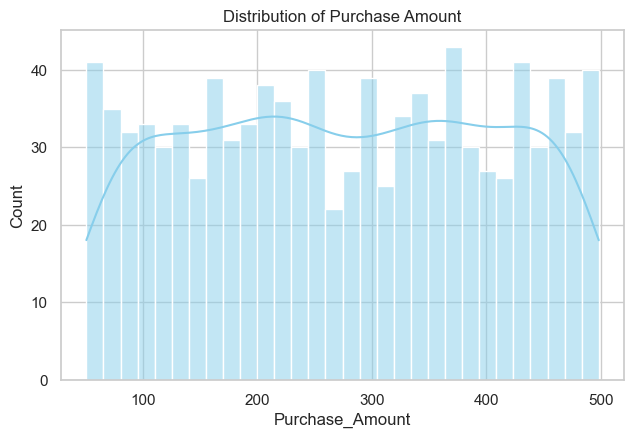

In [44]:
# Purchase Amount
plt.figure(figsize=(16, 10))
plt.subplot(2, 2, 1)
sns.histplot(df['Purchase_Amount'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Purchase Amount')


Text(0.5, 1.0, 'Distribution of Age')

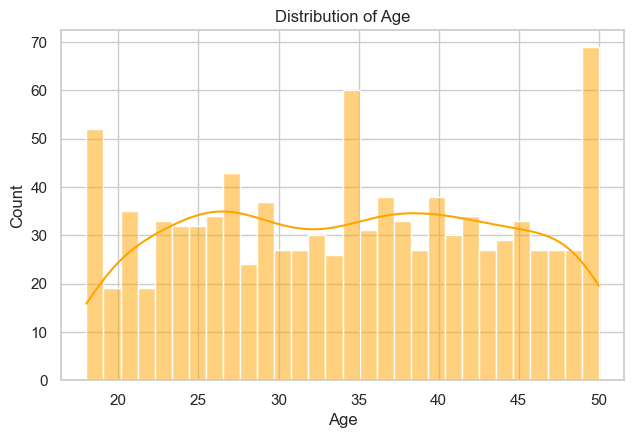

In [45]:
# Age
plt.figure(figsize=(16, 10))
plt.subplot(2, 2, 2)
sns.histplot(df['Age'], bins=30, kde=True, color='orange')
plt.title('Distribution of Age')

Text(0.5, 1.0, 'Customer Satisfaction Levels')

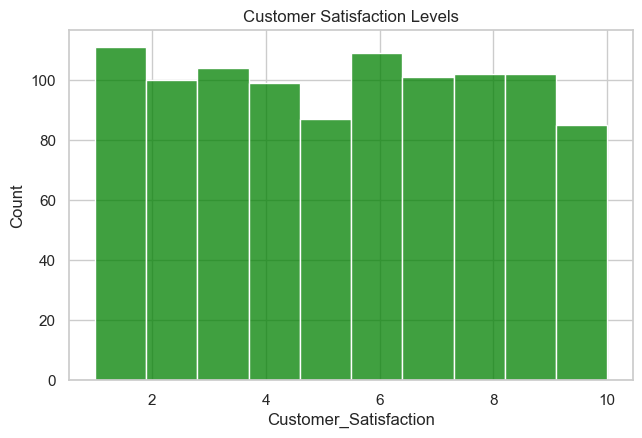

In [51]:
# Customer Satisfaction
plt.figure(figsize=(16, 10))
plt.subplot(2, 2, 3)
sns.histplot(df['Customer_Satisfaction'], bins=10, kde=False, color='green')
plt.title('Customer Satisfaction Levels')


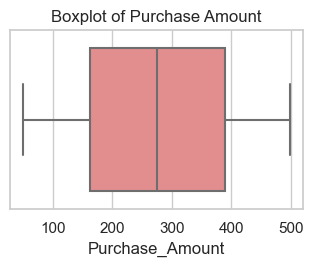

In [53]:
# Boxplot for Outliers
plt.subplot(2, 2, 4)
sns.boxplot(x='Purchase_Amount', data=df, color='lightcoral')
plt.title('Boxplot of Purchase Amount')

plt.tight_layout()
plt.show()

In [54]:
#Top Product Categories by Total Sales
top_categories = df.groupby('Purchase_Category')['Purchase_Amount'].sum().sort_values(ascending=False).head(10)

In [55]:
top_categories

Purchase_Category
Jewelry & Accessories    15139.36
Sports & Outdoors        14610.51
Electronics              13842.41
Software & Apps          13601.41
Toys & Games             13536.46
Home Appliances          13191.82
Food & Beverages         12966.96
Packages)                12731.16
Health Care              12149.03
Gardening & Outdoors     11782.28
Name: Purchase_Amount, dtype: float64

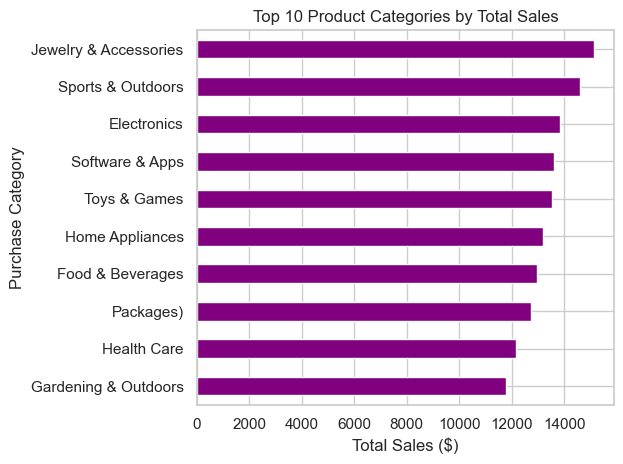

In [57]:
# Bar Chart of Top Categories
# plt.figure(figsize=(10, 6))
top_categories.plot(kind='barh', color='purple')
plt.xlabel('Total Sales ($)')
plt.ylabel('Purchase Category')
plt.title('Top 10 Product Categories by Total Sales')
plt.gca().invert_yaxis()  # Highest at top
plt.tight_layout()
plt.show()

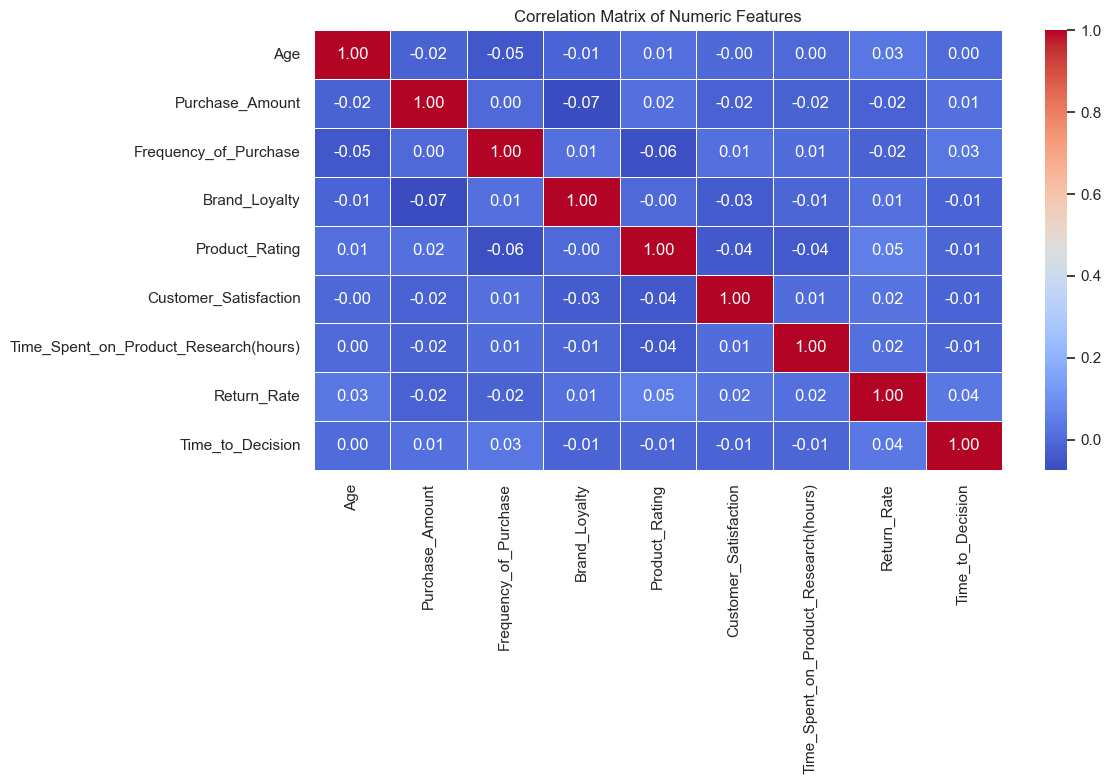

In [61]:
# Reconfigure Seaborn aesthetics
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
numeric_cols = ['Age', 'Purchase_Amount', 'Frequency_of_Purchase', 'Brand_Loyalty', 
                'Product_Rating', 'Customer_Satisfaction', 
                'Time_Spent_on_Product_Research(hours)', 'Return_Rate', 'Time_to_Decision']
correlation_matrix = df[numeric_cols].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

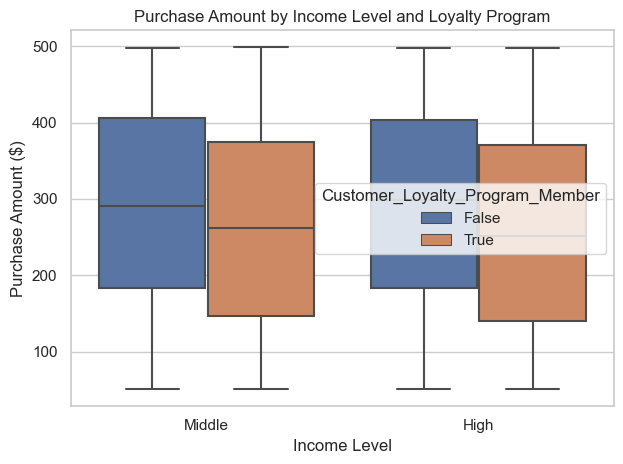

In [63]:
#Market Segmentation: Income Level & Loyalty Program
#plt.figure(figsize=(10, 6))
sns.boxplot(x='Income_Level', y='Purchase_Amount', hue='Customer_Loyalty_Program_Member', data=df)
plt.title('Purchase Amount by Income Level and Loyalty Program')
plt.xlabel('Income Level')
plt.ylabel('Purchase Amount ($)')
plt.tight_layout()
plt.show()

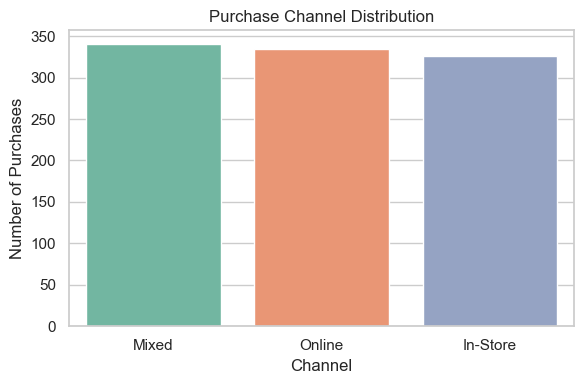

In [64]:
#Purchase Channel Distribution
channel_counts = df['Purchase_Channel'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=channel_counts.index, y=channel_counts.values, palette='Set2')
plt.title('Purchase Channel Distribution')
plt.ylabel('Number of Purchases')
plt.xlabel('Channel')
plt.tight_layout()
plt.show()

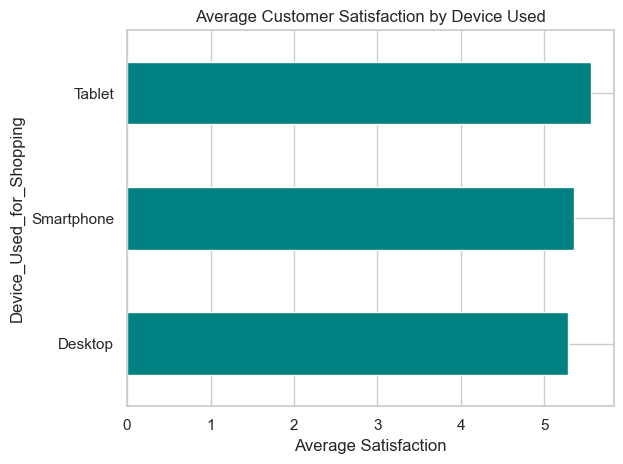

In [66]:
# Average Satisfaction by Device Used
device_satisfaction = df.groupby('Device_Used_for_Shopping')['Customer_Satisfaction'].mean().sort_values()
device_satisfaction.plot(kind='barh', color='teal')
plt.title('Average Customer Satisfaction by Device Used')
plt.xlabel('Average Satisfaction')
plt.tight_layout()
plt.show()

In [67]:
# Check for missing values before modeling
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Social_Media_Influence    247
Engagement_with_Ads       256
dtype: int64

Accuracy: 0.34
              precision    recall  f1-score   support

           0       0.31      0.31      0.31        52
           1       0.29      0.48      0.36        46
           2       0.34      0.22      0.27        54
           3       0.44      0.35      0.39        48

    accuracy                           0.34       200
   macro avg       0.35      0.34      0.33       200
weighted avg       0.35      0.34      0.33       200



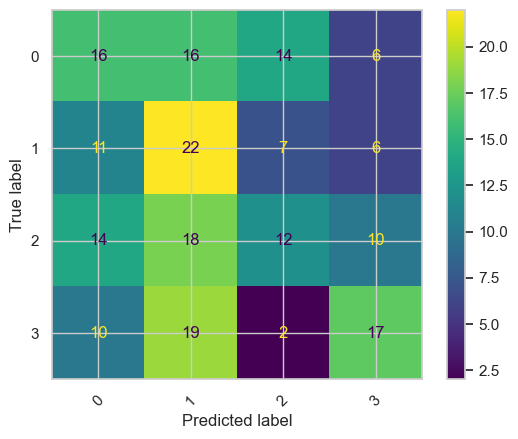

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# 🎯 Step 1: Define features and target
target = 'Purchase_Intent'
X = df[[
    'Age', 'Gender', 'Income_Level', 'Marital_Status', 'Education_Level',
    'Purchase_Amount', 'Frequency_of_Purchase', 'Purchase_Channel', 'Brand_Loyalty',
    'Product_Rating', 'Time_Spent_on_Product_Research(hours)',
    'Social_Media_Influence', 'Discount_Sensitivity', 'Return_Rate',
    'Engagement_with_Ads', 'Device_Used_for_Shopping', 'Payment_Method',
    'Discount_Used', 'Customer_Loyalty_Program_Member', 'Shipping_Preference',
    'Time_to_Decision'
]]
y = df[target]

#Step 2: Encode categorical data
X_encoded = X.copy()
y_encoded = LabelEncoder().fit_transform(y)

for col in X_encoded.select_dtypes(include=['object', 'bool']).columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Step 4: Train Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Step 5: Predict and Evaluate
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

# Detailed report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(xticks_rotation=45)


In [79]:
# First, copy the dataset
df_model = df.copy()

# Drop columns we don't need for modeling
df_model = df_model.drop(columns=['Customer_ID', 'Time_of_Purchase', 'PCA1', 'PCA2'], errors='ignore')

# One-hot encode categorical variables
df_model_encoded = pd.get_dummies(df_model, drop_first=True)

# Display the processed data
df_model_encoded.head()

,Age,Purchase_Amount,Frequency_of_Purchase,Brand_Loyalty,Product_Rating,Time_Spent_on_Product_Research(hours),Return_Rate,Customer_Satisfaction,Discount_Used,Customer_Loyalty_Program_Member,...,month_year_2024-03,month_year_2024-04,month_year_2024-05,month_year_2024-06,month_year_2024-07,month_year_2024-08,month_year_2024-09,month_year_2024-10,month_year_2024-11,month_year_2024-12
0,22,333.80,4,5,5,2.0,1,7,True,False,...,True,False,False,False,False,False,False,False,False,False
1,49,222.22,11,3,1,2.0,1,5,True,False,...,False,True,False,False,False,False,False,False,False,False
2,24,426.22,2,5,5,0.3,1,7,True,True,...,True,False,False,False,False,False,False,False,False,False
3,29,101.31,6,3,1,1.0,0,1,True,True,...,False,False,False,False,False,False,False,True,False,False
4,33,211.70,6,3,4,0.0,2,10,False,False,...,False,False,False,False,False,False,False,False,False,False


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
X = df_model_encoded.drop('Customer_Satisfaction', axis=1)
y = df_model_encoded['Customer_Satisfaction']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Predict
y_pred = reg_model.predict(X_test)

# Evaluate
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


R² Score: -0.6785908539869898
RMSE: 3.639334180080052


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## 1. Introduction & Objective
This project aims to analyze e-commerce consumer behavior to extract key insights that can inform business decisions. The dataset includes variables related to customer demographics, purchasing behavior, satisfaction, and product engagement.


## 2. Methodology
The approach includes:

•	Data loading and inspection: Checking for nulls, duplicates, and data types.

•	Data cleaning: Converting columns like Purchase_Amount to numeric and parsing date columns.

•	Exploratory Data Analysis (EDA): Using descriptive statistics and visualization (histograms, boxplots, heatmaps).

•	Segmentation Analysis: Evaluating behavior across income levels and loyalty membership.

•	Correlation Analysis: Identifying relationships between key variables to inform strategic decisions.


##Summary Statistics
Provided an overview of key variables like Age, Purchase_Amount, Satisfaction, Time to Decision, etc., to understand customer behavior profiles.

##📈 Distribution Analysis

•	Purchase Amount: Shows a right-skewed distribution, suggesting most purchases are low-value.
    
•	Age: Most customers fall within a specific age range.
    
•	Customer Satisfaction: Mostly high satisfaction levels (visualized using histograms).
    
•	Outliers: Boxplots show some high-value purchase outliers which may need investigation.
    
    
## Top Product Categories

Top 10 purchase categories by total sales were identified and visualized. These categories can be targeted for promotion or upselling strategies.

## Correlation Matrix
Shows strong correlations:
    
•	Customer Satisfaction ↔ Product Rating

•	Time Spent on Research ↔ Time to Decision

•	Return Rate ↔ Customer Satisfaction (Negative correlation)



## 5. Business Recommendations
1.Target High-Performing Categories: Focus marketing on top categories identified from sales data.

2.Enhance Product Information: Given the link between time spent researching and decision-making, enriching product pages may improve conversion.

3.Customer Segmentation Strategy:

o	High-income & loyalty members spend more, onsider exclusive campaigns for them.

o	Develop incentives for lower-income customers to join loyalty programs.

4.Address High Return Rates: Products with high return rates should be reviewed for quality or better post-sale engagement.

5.Personalize Experience Based on Satisfaction and Rating Feedback: Use these metrics to segment customers and tailor follow-ups.
________________________________________
